<a href="https://colab.research.google.com/github/Sanj112/Jango-Aano-/blob/main/Jango_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import torch.nn as nn
from torch.nn.functional import conv2d,max_pool2d,log_softmax,linear,relu,dropout2d
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image, ImageDraw
import numpy as np
import os
import pandas as pd


In [21]:
train_path="/content/drive/My Drive/jackfruit_mango_classifier/training_set"
training_csv = '/content/drive/MyDrive/jackfruit_mango_classifier/training_set/training_data.csv'

In [22]:
data = pd.read_csv(r'/content/drive/MyDrive/jackfruit_mango_classifier/training_set/training_data.csv')
#data.head()
#data.tail()

In [23]:
data['label'].value_counts()

1    20
0    20
Name: label, dtype: int64

FileNotFoundError: ignored

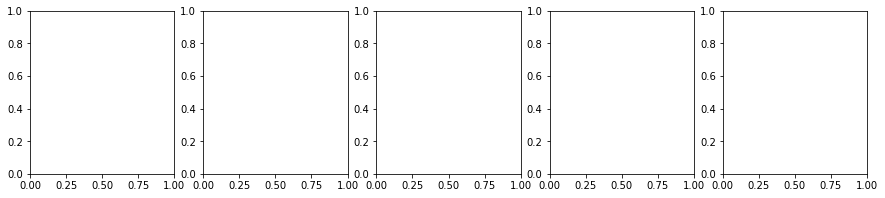

In [24]:
fig,ax = plt.subplots(1,5,figsize = (15,3))
for i,idx in enumerate(data[data['label'] == 0]['id'][:5]):
  path = train_path + "/" + idx
  #print(ax[i])
  ax[i].imshow(img.imread(path))


FileNotFoundError: ignored

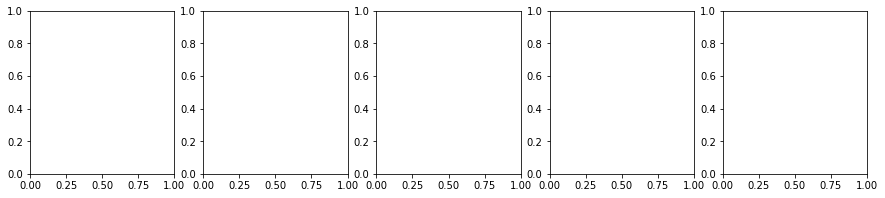

In [30]:
fig,ax = plt.subplots(1,5,figsize = (15,3))
for i,idx in enumerate(data[data['label'] == 1]['id'][:5]):
  path = train_path + "/" + idx
  aax = Image.open(path)
  #abx= aax.resize((32, 32))
  plt.figure(figsize=(3, 3))
  abx.show()
  #ax[i].imshow(img.imread(path))

In [39]:
#architecture based on Lenet
class newmodel(nn.Module):
  #defining basic layers
  def __init__(self):
    super(newmodel, self).__init__()
    self.conv1=nn.conv2d(in_channels=3, out_channels=6, kernel_size=5)
    self.pool= max_pool2d(2,2)
    self.conv2=nn.conv2d(in_channels=6, out_channels=16, kernel_size=5)
    self.fully_connected1=linear(16,120)
    self. fully_connected2 =linear(120,84)
    self.fully_connect3=linear(84,3)
    self.drop=dropout2d(training = self.training)
      

  def forward(self,x):
    x=self.ppl(relu(self.conv1(x)))
    x=self.pool(relu(self.conv2(x)))
    x=x.flatten(1)
    x=(self.fully_connected1(x))
    x=self.fully_connected(x)
    x=self.drop(x,training = self.training)
    x=log_softmax(self.fully_connected(x),dim=1)
    return x


In [40]:
model = newmodel()
print(model)

AttributeError: ignored

In [42]:
#loss function and optimiser
epochs = 10
batch_size = 5
learning_rate = 0.01
loss_func = torch.nn.NLLLoss()
optimise=torch.optim.Adam(model.parameters(),lr=0.01)

NameError: ignored

In [ ]:
if torch.cuda.is_available():
    device="cuda"

else 
    device="CPU"   
    
model = newmodel().to(device)

In [43]:
#training and testing
train_loss=[]
val_loss=[]

for epoch in range(epochs):
  trainloss=0
  valloss=0

  model.train()
  for data,label in train_data_loader:
    data = data.to(device)
    label = label.to(device)

    #to clear gradients
    optimizer.zero_grad()
    output = model(data)
    loss = loss_func(output,label)
    loss.backward()
    optimise.detp()
    trainloss += loss.item() #.item to convert to float
    train_loss.append(trainloss)

    model.eval()

  for data,label in val_data_loader:
    data = data.to(device)
    label = label.to(device)
    output = model(data)
    loss = loss_func(output,label)
    validloss += loss.item() 
    valid_loss.append(validloss)

    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    torch.save(model.state_dict(), 'model.ckpt')
     

NameError: ignored

In [ ]:
model.eval()
with torch.no_grad()
correct=0
total=0
  for data,label in val_data_loader:
    data = data.to(device)
    label = label.to(device)
    output = model(data)
    _, predict = torch.max(outputs.data, 1)
    total+=1
  if (predicted==label):
    corect+=1
  print('Accuracy:'+ str(100*correct/total))

In [ ]:
#visualise fitting
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_loss, label='Training loss')
plt.plot(valid_loss, label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)
